In [17]:
from pystac_client import Client
from odc.stac import load
from matplotlib import colors

In [18]:
catalog = "https://stac.staging.digitalearthpacific.org"
client = Client.open(catalog)

In [19]:
fiji_bbox = [177.2, -18.4, 178.9, -17.2]
datetime = "2023"

items = list(client.search(collections=["dep_s2s1_mrd"], bbox=fiji_bbox).items())

print(f"Found {len(items)} items")

Found 6 items


In [20]:
data = load(items, bbox=fiji_bbox, resolution=100, chunks={})
data

<xarray.Dataset>
Dimensions:      (y: 1396, x: 1894, time: 1)
Coordinates:
  * y            (y) float64 -1.931e+06 -1.932e+06 ... -2.071e+06 -2.071e+06
  * x            (x) float64 3.028e+06 3.028e+06 ... 3.217e+06 3.217e+06
    spatial_ref  int32 3832
  * time         (time) datetime64[ns] 2023-01-01
Data variables:
    class        (time, y, x) float32 dask.array<chunksize=(1, 1396, 1894), meta=np.ndarray>
    proba        (time, y, x) float32 dask.array<chunksize=(1, 1396, 1894), meta=np.ndarray>

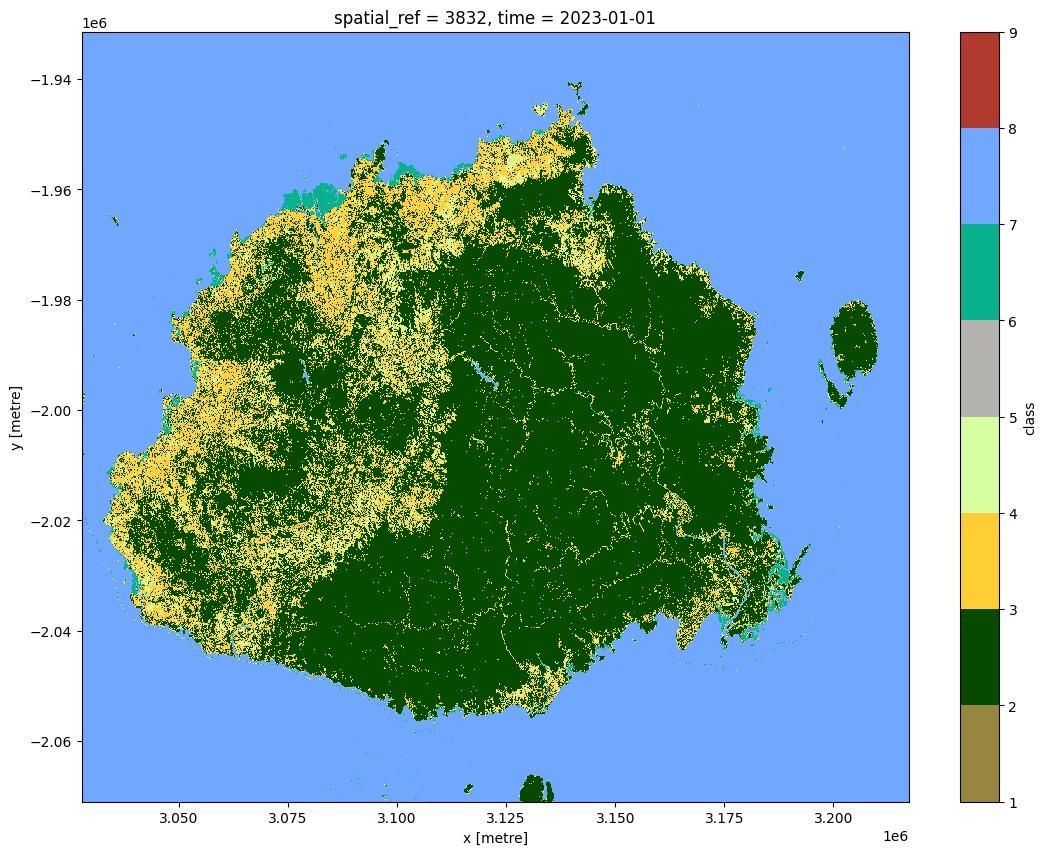

In [21]:
classes = [
    [1, "bare_land", "#968640"],
    [2, "forest", "#064a00"],
    [3, "crops", "#ffce33"],
    [4, "grassland", "#d7ffa0"],
    [5, "settlements", "#b3b2ae"],
    [6, "mangroves", "#07b28d"],
    [7, "water", "#71a8ff"],
    [8, "quarry", "#b03a2e"]
]

values_list = [c[0] for c in classes]
color_list = [c[2] for c in classes]

# Build a listed colormap.
c_map = colors.ListedColormap(color_list)
bounds = values_list + [9]
norm = colors.BoundaryNorm(bounds, c_map.N)

data["class"].isel(time=0).plot.imshow(cmap=c_map, norm=norm, size=10)